# COGS 108 - Final Project 

# Overview

The project aims to explore whether or not health inspection practices are similar across different zipcodes and across different inspectors. After cleaning the available data, we can see that there is a difference between the number of violations and postal code (which can be explained by population/population density). Additionally, we found that there is a disparity between the proportion of number of points given by a health inspector and how many visits the health inspector has done. The range of this is ~ 0.6 or 60%.

# Name & PID

- Name: Selena Somvilay
- PID: A15540879

# Research Question

Are health inspection practices standardized across different zipcodes and inspectors?

## Background and Prior Work

Health inspection practices vary from state to state and even amongst cities. However, do rating practices maintain consistency within the same city or area? Although there is a standardized Food Code set by the U.S. Food and Drug Administration (FDA), it is not enforced nor is it mandatory for restaurants to follow on a federal level. According to the FDA’s website, the FDA Food Code is used for a model for local, state, tribal, and federal regulators to develop their own set of rules (1). Dining Grades, which is a website created by Dr. Harlan Stueven who is a Board Certified Emergency physician, discussed why restaurant grading solutions should maintain consistency. On this website, Dr. Stueven reviews the variances between health inspection practices and says, 'If noteworthy variance exists in the latitude and the application of compliance measurement, the scoring becomes less valuable in protecting the public safety, is unfair to the restaurant, and confusing to the public' (2). In Dr. Stueven’s Dining Grades database he found that 'between 97% to 100% of all inspections are perfect in multiple municipalities, yet the probability of getting a perfect grade in other municipalities may be as low as 28%'. In an article by the San Gabriel Valley Tribune, 'What that restaurant letter grade isn’t telling you about health and cleanliness' (Stephanie K. Baer, 2017), it brings up the fact that restaurants can hold a high grade while they get shut down. In San Gabriel Valley, 1069 permit suspensions were issued to restaurants, but 1015 (around 95%) of them had received an A or B grading (3). This could be evidence that health inspection practices are not standardized since the restaurants that closed still held an A or B grading. This effect could be due to differences in health inspectors as well, typically health inspectors are assigned to a specific region. Regions with a "stricter" health inspector may face more consequences than a region with a more lenient inspector.

References (include links):
- 1) https://www.fda.gov/food/retail-food-protection/fda-food-code- 
- 2) https://www.dininggrades.com/blog/restaurant-grading-solutions/- 
- 3) https://www.sgvtribune.com/2015/06/25/what-that-restaurant-letter-grade-isnt-telling-you-about-health-and-cleanliness/- 

# Hypothesis


Health inspection ratings are not consistent within municipalities. Some health inspectors are more lenient than others because of the lack of standarization. The amount of variance make it difficult to standardize a single health guideline. 

# External Data

Population by Zip Code from the 2010 Census

https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, kstest

Imported Numpy, Pandas, Matplotlib, and Seaborn libraries to aid in the analysis.

Need to import the .csv data files into pandas dataframes

In [2]:
#saving the data into dataframes
df_inspections = pd.read_csv('inspections.csv')

df_restaurants = pd.read_csv('restaurants.csv')

df_violations = pd.read_csv('violations.csv')


In [361]:
#this cell is to restart the dataframes if I mess up

df_population = pd.read_csv('2010_Census_Populations_by_Zip_Code.csv')

In [4]:
#viewing the datasets

df_inspections.head(5)

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df_restaurants.head(5)

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


In [6]:
df_violations.head(5)

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [347]:
df_population.head(5)

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.5,0,1,1,1.00
1,90001,57110,26.6,28468,28642,12971,4.40
2,90002,51223,25.5,24876,26347,11731,4.36
3,90003,66266,26.3,32631,33635,15642,4.22
4,90004,62180,34.8,31302,30878,22547,2.73


# Data Cleaning

For each dataset, rename columns and remove the columns that will not be used.

### Inspections Dataset

In [7]:
df_inspect = df_inspections[['hsisid', 'date', 'name', 'postalcode', 'num_non_critical', 'critical', 
                    'num_non_critical_previous', 'num_critical_previous', 
                    'num_non_critical_mean_previous', 'num_critical_mean_previous', 
                    'avg_neighbor_num_non_critical', 'avg_neighbor_num_critical']]

df_inspect.columns = ['hsisid', 'date', 'name', 'postalcode', 'non critical', 'critical', 
                      'non critical prev', 'critical prev', 'non critical prev avg', 'critical prev avg', 
                      'neighbor non critical avg', 'neighbor critical avg']

In [8]:
#view the dataset
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,27610,7,1,NaN,NaN,NaN,NaN,NaN,NaN
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,27610,11,0,NaN,NaN,NaN,NaN,NaN,NaN
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,27610,8,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,27513,3,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,27597,4,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,27616,13,1,4.0,1.0,4.777778,1.000000,9.863838,4.692525
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,27513,3,1,5.0,2.0,3.250000,0.750000,5.972381,5.853333
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,27519,4,1,2.0,0.0,1.750000,0.875000,3.000000,2.466667
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,27603-5631,2,1,3.0,0.0,2.000000,1.111111,4.606349,3.737302


In [9]:
#from first glance you can see there are NaN values, check for all NaN rows

NaN_rows = df_inspect[df_inspect.isnull().any(axis=1)]
NaN_rows

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,27610,7,1,NaN,NaN,NaN,NaN,NaN,NaN
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,27610,11,0,NaN,NaN,NaN,NaN,NaN,NaN
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,27610,8,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,27513,3,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,27597,4,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18362,4092017300,2016-10-26T00:00:00Z,WENDY'S #6324,27560,1,1,NaN,NaN,NaN,NaN,3.900000,2.616667
18363,4092017343,2016-10-26T00:00:00Z,SLEEP INN FOODSERVICE,27587,3,1,NaN,NaN,NaN,NaN,4.239048,1.920952
18408,4092017285,2016-10-28T00:00:00Z,Szechuan Garden Morrisville,27560,4,1,NaN,NaN,NaN,NaN,4.045714,3.021429
18427,4092021984,2016-10-31T00:00:00Z,SPEEDY BURRITOS,27616,12,1,NaN,NaN,NaN,NaN,8.419394,2.892525


In [10]:
#remove NaN rows from dataset

df_inspect = df_inspect.dropna()
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg
398,4092160070,2012-11-05T00:00:00Z,SUNRISE OF CARY FOODSERVICE,27513,3,1,7.0,8.0,7.000000,8.000000,9.600000,5.800000
496,4092013936,2012-11-19T00:00:00Z,Apex High Culinary Arts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000
630,4092110006,2012-12-03T00:00:00Z,Adams Elementary Cafeteria,27511-4255,3,1,3.0,1.0,3.000000,1.000000,3.400000,2.400000
640,4092050026,2012-12-04T00:00:00Z,St Mary Magdalene School Cafeteria,27502,0,1,7.0,5.0,7.000000,5.000000,3.800000,5.400000
652,4092016126,2012-12-05T00:00:00Z,PANERA BREAD #1650,27502,9,1,6.0,3.0,6.000000,3.000000,4.600000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,27616,13,1,4.0,1.0,4.777778,1.000000,9.863838,4.692525
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,27513,3,1,5.0,2.0,3.250000,0.750000,5.972381,5.853333
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,27519,4,1,2.0,0.0,1.750000,0.875000,3.000000,2.466667
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,27603-5631,2,1,3.0,0.0,2.000000,1.111111,4.606349,3.737302


Viewing the new inspections data, I can see that there's data for cafeterias and market places. For this research question, we will be concerned about the data from restaurants only.

In [11]:
#view the different facility types

df_restaurants['facilitytype'].unique()

array(['Restaurant', 'Pushcarts', 'Institutional Food Service',
       'Public School Lunchrooms', 'Food Stand', 'Meat Market',
       'Mobile Food Units', 'Elderly Nutrition Sites (catered)',
       'Private School Lunchrooms', 'Limited Food Service'], dtype=object)

In [12]:
#saving data from Restaurants only & removing unnecessary columns

df_restaurants = df_restaurants[df_restaurants.facilitytype == 'Restaurant']

df_rest = df_restaurants[['hsisid', 'name', 'postalcode']] #we do not need to save 'facilitytype' because they are all 'Restaurant'
df_rest

,hsisid,name,postalcode
0,4092017230,SPRING CAFE 2,27616-1895
2,4092014444,Taco Bell #22798,27587
3,4092015333,THE REMEDY DINER,27601
6,4092016679,BITTERSWEET,27601
7,4092014493,Chick-fil-A #1573,27617
...,...,...,...
3319,4092016658,LA ROMA PIZZA,27529
3320,4092016663,BOJANGLES #5,27603
3321,4092016557,BURGER KING #19795,27587
3322,4092017227,QUICKLY,27560


From the restaurants dataframe, we need to check if the facilities from the inspections dataframe are restaurants.
If the facilities from the inspections dataframe are not classified as restaurants then we will remove that data from the dataframe.

In [13]:
df_inspect['name'].unique()
df_rest['name'].unique()

array(['SPRING CAFE 2', 'Taco Bell #22798', 'THE REMEDY DINER', ...,
       'BURGER KING #19795', 'QUICKLY', 'HARRIS TEETER #43 STARBUCKS'],
      dtype=object)

The names are not standardize, we'll create a function that will standardize the names so it is easier to compare the names from each dataframe

In [14]:
def standardize_name(string):
    string = string.lower()
    string = string.strip()
    
    if ' ' in string: string = string.replace(' ', '')
    
    return string

In [15]:
df_inspect['name']  = df_inspect['name'].apply(standardize_name)

df_inspect

C:\Users\ssomv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg
398,4092160070,2012-11-05T00:00:00Z,sunriseofcaryfoodservice,27513,3,1,7.0,8.0,7.000000,8.000000,9.600000,5.800000
496,4092013936,2012-11-19T00:00:00Z,apexhighculinaryarts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000
630,4092110006,2012-12-03T00:00:00Z,adamselementarycafeteria,27511-4255,3,1,3.0,1.0,3.000000,1.000000,3.400000,2.400000
640,4092050026,2012-12-04T00:00:00Z,stmarymagdaleneschoolcafeteria,27502,0,1,7.0,5.0,7.000000,5.000000,3.800000,5.400000
652,4092016126,2012-12-05T00:00:00Z,panerabread#1650,27502,9,1,6.0,3.0,6.000000,3.000000,4.600000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,sinowok,27616,13,1,4.0,1.0,4.777778,1.000000,9.863838,4.692525
18462,4092110100,2016-11-03T00:00:00Z,weatherstoneelem.sch.cafeteria,27513,3,1,5.0,2.0,3.250000,0.750000,5.972381,5.853333
18463,4092110487,2016-11-03T00:00:00Z,alstonridgeelementaryschoolcafeteria,27519,4,1,2.0,0.0,1.750000,0.875000,3.000000,2.466667
18464,4092300177,2016-11-03T00:00:00Z,foodlion#996meatmarket,27603-5631,2,1,3.0,0.0,2.000000,1.111111,4.606349,3.737302


In [16]:
df_rest['name'] = df_rest['name'].apply(standardize_name)

df_rest

C:\Users\ssomv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hsisid,name,postalcode
0,4092017230,springcafe2,27616-1895
2,4092014444,tacobell#22798,27587
3,4092015333,theremedydiner,27601
6,4092016679,bittersweet,27601
7,4092014493,chick-fil-a#1573,27617
...,...,...,...
3319,4092016658,laromapizza,27529
3320,4092016663,bojangles#5,27603
3321,4092016557,burgerking#19795,27587
3322,4092017227,quickly,27560


In [17]:
#will check if the facility from inspection data is classified as a restaurant from the restaurants dataframe
is_restaurant = df_inspect.name.isin(df_rest.name) 
is_restaurant

#makes a new column to the inspection data
df_inspect['is_restaurant'] = is_restaurant
df_inspect

C:\Users\ssomv\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,is_restaurant
398,4092160070,2012-11-05T00:00:00Z,sunriseofcaryfoodservice,27513,3,1,7.0,8.0,7.000000,8.000000,9.600000,5.800000,False
496,4092013936,2012-11-19T00:00:00Z,apexhighculinaryarts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000,True
630,4092110006,2012-12-03T00:00:00Z,adamselementarycafeteria,27511-4255,3,1,3.0,1.0,3.000000,1.000000,3.400000,2.400000,False
640,4092050026,2012-12-04T00:00:00Z,stmarymagdaleneschoolcafeteria,27502,0,1,7.0,5.0,7.000000,5.000000,3.800000,5.400000,False
652,4092016126,2012-12-05T00:00:00Z,panerabread#1650,27502,9,1,6.0,3.0,6.000000,3.000000,4.600000,6.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,sinowok,27616,13,1,4.0,1.0,4.777778,1.000000,9.863838,4.692525,False
18462,4092110100,2016-11-03T00:00:00Z,weatherstoneelem.sch.cafeteria,27513,3,1,5.0,2.0,3.250000,0.750000,5.972381,5.853333,False
18463,4092110487,2016-11-03T00:00:00Z,alstonridgeelementaryschoolcafeteria,27519,4,1,2.0,0.0,1.750000,0.875000,3.000000,2.466667,False
18464,4092300177,2016-11-03T00:00:00Z,foodlion#996meatmarket,27603-5631,2,1,3.0,0.0,2.000000,1.111111,4.606349,3.737302,False


In [18]:
df_inspect = df_inspect[df_inspect.is_restaurant == True]
#df_inspect.reset_index(inplace=False)
df_inspect = df_inspect.drop('is_restaurant', 1)
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg
496,4092013936,2012-11-19T00:00:00Z,apexhighculinaryarts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000
652,4092016126,2012-12-05T00:00:00Z,panerabread#1650,27502,9,1,6.0,3.0,6.000000,3.000000,4.600000,6.000000
828,4092015656,2012-12-21T00:00:00Z,ontheborder,27511-4735,1,1,4.0,0.0,4.000000,0.000000,3.600000,1.600000
854,4092016210,2013-01-02T00:00:00Z,garnerrdstopngo,27610,2,1,3.0,7.0,3.000000,7.000000,5.400000,2.600000
892,4092016261,2013-01-07T00:00:00Z,subway,27539,0,1,7.0,16.0,7.000000,16.000000,5.000000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
18453,4092015590,2016-11-03T00:00:00Z,archibald`stavern,27539,7,1,4.0,11.0,5.500000,5.000000,6.629798,4.579798
18454,4092016479,2016-11-03T00:00:00Z,theoval,27695,6,1,3.0,1.0,2.000000,1.714286,5.537316,1.766580
18455,4092016866,2016-11-03T00:00:00Z,awaz'eethiopian/eritreancuisine,27513,5,1,6.0,0.0,5.750000,4.000000,8.104444,3.035556
18456,4092016949,2016-11-03T00:00:00Z,tavernaagora,27603,6,1,2.0,5.0,1.333333,4.333333,6.834524,3.864286


Now the inspection data only shows data from facilities that are restaurants. 
##### Let's standardize the postal codes.

In [19]:
df_inspect['postalcode'].unique()

array(['27502', '27511-4735', '27610', '27539', '27511', '27603-1935',
       '27616-4483', '27526-3602', '27612', '27518', '27502-2188',
       '27513-4175', '27612-4532', '27607-3624', '27616', '27545',
       '27609', '27606', '27609-4436', '27511-4219', '27587', '27526',
       '27604', '27511-9205', '27617', '27609-6201', '27601',
       '27511-8553', '27613', '27513', '27587-7487', '27560-9194',
       '27540', '27610-1363', '27613-4091', '27597', '27560-9193',
       '27606-3328', '27560', '27511-6892', '27606-2720', '27529-3637',
       '27607', '27523-7140', '27511-6616', '27511-6668', '27613-4389',
       '27529-2547', '27605-1314', '27511-7708', '27607-5406',
       '27610-9366', '27520-9306', '27615-3416', '27587-6200', '27615',
       '27519', '27615-2970', '27614', '27545-7717', '27615-1902',
       '27609-7829', '27603-5631', '27511-6894', '27616-2945',
       '27511-6804', '27610-4186', '27511-7050', '27526-2235',
       '27511-6606', '27591-8309', '27603', '27614-8227'

For this, we will just take the first five numbers for each postal code.

In [20]:
df_inspect['postalcode'] = df_inspect['postalcode'].str[:5]

In [21]:
df_inspect['postalcode'].unique()

array(['27502', '27511', '27610', '27539', '27603', '27616', '27526',
       '27612', '27518', '27513', '27607', '27545', '27609', '27606',
       '27587', '27604', '27617', '27601', '27613', '27560', '27540',
       '27597', '27529', '27523', '27605', '27520', '27615', '27519',
       '27614', '27591', '27562', '27608', '27592', '27695', '27628',
       '27571', '27652', '27512', '27709', '27595', '27650', '27501',
       '27579', '28587'], dtype=object)

In [22]:
df_inspect['postalcode'] = df_inspect['postalcode'].astype(np.str)

In [47]:
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,4092013936,2012-11-19T00:00:00Z,apexhighculinaryarts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000,21
1,4092013936,2013-03-26T00:00:00Z,apexhighculinaryarts,27502,3,1,7.0,5.0,5.500000,8.000000,5.900000,4.400000,21
2,4092015656,2012-12-21T00:00:00Z,ontheborder,27511,1,1,4.0,0.0,4.000000,0.000000,3.600000,1.600000,15
3,4092015656,2013-12-12T00:00:00Z,ontheborder,27511,7,1,0.0,2.0,1.666667,1.000000,4.180000,0.890000,15
4,4092015656,2014-06-23T00:00:00Z,ontheborder,27511,12,0,7.0,1.0,3.000000,1.000000,4.733333,0.820000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,4092017133,2016-09-19T00:00:00Z,twistedfork,27616,18,1,9.0,2.0,9.000000,2.000000,8.516667,3.055556,19
3672,4092016751,2016-09-20T00:00:00Z,leli'sdiner,27587,1,0,6.0,5.0,7.333333,7.000000,6.382143,3.784286,29
3673,4092017019,2016-09-23T00:00:00Z,carolinabrewingcompanytaproom,27540,1,0,0.0,1.0,0.000000,1.000000,2.454286,2.649524,1
3674,4092016733,2016-09-26T00:00:00Z,carolinabarbecue,27529,5,1,9.0,5.0,6.666667,2.666667,5.300000,1.950000,14


It looks like there are some repeat restaurants from different dates. For our analysis, we will only be looking at data from the same year.

In [55]:
df_inspect['date'] = df_inspect['date'].str[:4]
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,4092013936,2012,apexhighculinaryarts,27502,7,1,4.0,11.0,4.000000,11.000000,6.400000,5.200000,21
1,4092013936,2013,apexhighculinaryarts,27502,3,1,7.0,5.0,5.500000,8.000000,5.900000,4.400000,21
2,4092015656,2012,ontheborder,27511,1,1,4.0,0.0,4.000000,0.000000,3.600000,1.600000,15
3,4092015656,2013,ontheborder,27511,7,1,0.0,2.0,1.666667,1.000000,4.180000,0.890000,15
4,4092015656,2014,ontheborder,27511,12,0,7.0,1.0,3.000000,1.000000,4.733333,0.820000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,4092017133,2016,twistedfork,27616,18,1,9.0,2.0,9.000000,2.000000,8.516667,3.055556,19
3672,4092016751,2016,leli'sdiner,27587,1,0,6.0,5.0,7.333333,7.000000,6.382143,3.784286,29
3673,4092017019,2016,carolinabrewingcompanytaproom,27540,1,0,0.0,1.0,0.000000,1.000000,2.454286,2.649524,1
3674,4092016733,2016,carolinabarbecue,27529,5,1,9.0,5.0,6.666667,2.666667,5.300000,1.950000,14


In [57]:
#to find how much data there is per year
df_inspect['date'].value_counts()

2015    1261
2014     885
2013     876
2016     652
2012       2
Name: date, dtype: int64

There is the most data from 2015, therfore we will only use data from 2015 for our analysis.

In [58]:
df_inspect = df_inspect[df_inspect.date == '2015']
df_inspect

,hsisid,date,name,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
7,4092016210,2015,garnerrdstopngo,27610,4,1,12.0,12.0,7.000000,7.200000,3.233333,1.586667,63
16,4092016077,2015,chinacary,27511,2,0,1.0,0.0,3.000000,0.857143,3.518333,1.620000,9
20,4092016242,2015,tarbouch,27612,1,0,3.0,1.0,6.250000,6.000000,5.547619,2.656190,58
24,4092015836,2015,tijuanaflats#155,27511,4,0,4.0,0.0,2.857143,0.714286,3.670000,0.660000,12
29,4092016120,2015,panerabread#1641,27612,14,1,5.0,4.0,8.666667,4.166667,8.693333,4.388333,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,4092016624,2015,wafflehouse#2051,27607,4,1,2.0,2.0,2.666667,1.333333,5.842222,1.595556,6
3538,4092016698,2015,goldencorral#950,27603,10,1,6.0,6.0,6.000000,3.666667,5.486667,2.980000,27
3539,4092017000,2015,thegardengrille&amp;barbyhilton,27612,11,1,7.0,4.0,7.000000,4.000000,5.870000,2.680000,37
3540,4092015303,2015,romanosmacaronigrill,27511,14,1,16.0,6.0,11.400000,3.000000,3.580952,0.554762,41


At this point, we do not need the name or year column anymore.
We have already ensured all the establishments are restaurants and the data is from 2015. We will be identifying each establishment through their HSISID.

In [66]:
df_safekeeping = df_inspect.drop(['date', 'name'], 1)
df_safekeeping = df_safekeeping.reset_index(inplace = False)
df_safekeeping = df_safekeeping.drop('index', 1)
df_safekeeping

,hsisid,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,4092016210,27610,4,1,12.0,12.0,7.000000,7.200000,3.233333,1.586667,63
1,4092016077,27511,2,0,1.0,0.0,3.000000,0.857143,3.518333,1.620000,9
2,4092016242,27612,1,0,3.0,1.0,6.250000,6.000000,5.547619,2.656190,58
3,4092015836,27511,4,0,4.0,0.0,2.857143,0.714286,3.670000,0.660000,12
4,4092016120,27612,14,1,5.0,4.0,8.666667,4.166667,8.693333,4.388333,57
...,...,...,...,...,...,...,...,...,...,...,...
1256,4092016624,27607,4,1,2.0,2.0,2.666667,1.333333,5.842222,1.595556,6
1257,4092016698,27603,10,1,6.0,6.0,6.000000,3.666667,5.486667,2.980000,27
1258,4092017000,27612,11,1,7.0,4.0,7.000000,4.000000,5.870000,2.680000,37
1259,4092015303,27511,14,1,16.0,6.0,11.400000,3.000000,3.580952,0.554762,41


### Violations Dataset

In [24]:
df_violations = df_violations[['hsisid', 'category', 'critical',
                               'severity', 'inspectedby', 'violationtype',
                               'observationtype', 'pointvalue']]

#checking the NaN rows
NaN_rows2 = df_violations[df_violations.isnull().any(axis=1)]
NaN_rows2

df_violations = df_violations.dropna()
df_violations.reset_index(inplace=False)
df_violations

,hsisid,category,critical,severity,inspectedby,violationtype,observationtype,pointvalue
0,4092015279,Chemical,Yes,Priority Foundation,Lucy Schrum,R,Out,0
1,4092014572,Chemical,Yes,Priority Foundation,Daryl Beasley,CDI,Out,0
2,4092015906,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
3,4092013840,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
4,4092021788,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
...,...,...,...,...,...,...,...,...
189795,4092014127,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
189797,4092015549,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
189798,4092016135,Chemical,Yes,Priority Foundation,James Smith,R,Out,1
189799,4092020997,Chemical,Yes,Priority Foundation,Andrea Anover,CDI,Out,0


To find out the meaning of each column, I referred to <a href=https://www.mecknc.gov/HealthDepartment/EnvironmentalHealth/FoodserviceandFacilities/Documents/DENR4007.pdf> this </a> PDF from Mecklenburg, North Carolina.

<i>Severity</i> 
<ul><li>Priority (Critical)</li>
    <li>Priority Foundation</li> 
    <li>Core (Non Critical)</li></ul>

<i>Violation Type</i>
<ul><li>CDI = Corrected During Inspection</li>
    <li>R = Repeat Violation</li>
    <li>VR = Verification Required</li></ul>

<i>Observation Type</i>
<ul><li>In = In Compliance</li>
    <li>Out = Not in Compliance</li>
    <li>N/O - Not observed</li>
    <li>N/A = Not applicable</li></ul>

In [25]:
#checking the num of each severity category
df_violations['severity'].value_counts()

Priority Foundation    32391
Priority               29738
Core                   27203
Name: severity, dtype: int64

In [26]:
#checking the num of each violation type category
df_violations['violationtype'].value_counts()

CDI    59116
R      25551
VR      4665
Name: violationtype, dtype: int64

In [27]:
#checking the num of each observation type
#and for N/A values in Observation Types
obs_types = df_violations['observationtype'].value_counts()
obs_types

Out    89179
In       149
N/O        4
Name: observationtype, dtype: int64

We are interested in Out of Compliance instances, therefore we will remove instances of In Compliance or Not Observed

In [28]:
df_violations = df_violations[df_violations.observationtype != 'In']
df_violations = df_violations[df_violations.observationtype != 'N/O']
df_violations.shape[0] == obs_types[0]

True

Now we should look at how many violations there were per HSISID and save this value

In [29]:
num_violations = df_violations['hsisid'].value_counts()
num_violations

4092015115    246
4092013966    242
4092010989    162
4092015939    142
4092014399    141
             ... 
4092017186      1
4092017137      1
4092021759      1
4092140551      1
4092021949      1
Name: hsisid, Length: 4199, dtype: int64

In [67]:
#will check if the HSISID from the violations data is present in the inspection data
has_vio = df_violations.hsisid.isin(df_inspect.hsisid) 
has_vio

#creates a new column that will indicate if the HSISID has had violations
df_safekeeping['has_violations'] = has_vio
df_safekeeping

#only saves the restaurants with HSISIDs which have violations attached to them
df_safekeeping = df_safekeeping[df_safekeeping.has_violations == True]
df_safekeeping = df_safekeeping.reset_index(inplace = False)
df_safekeeping = df_safekeeping.drop(['has_violations'] , axis = 1)

df_safekeeping

,index,hsisid,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,6,4092013641,27616,9,1,6.0,1.0,7.777778,2.333333,8.261190,2.891667,75
1,11,4092013248,27609,5,0,5.0,0.0,7.142857,3.428571,6.377302,2.267460,45
2,13,4092013541,27511,4,0,17.0,14.0,13.428571,8.714286,10.266667,5.864286,115
3,15,4092015613,27526,3,1,6.0,6.0,5.111111,4.888889,7.012222,4.398889,93
4,16,4092015613,27526,3,1,3.0,6.0,4.900000,5.000000,7.178889,4.465556,93
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1240,4092011948,27612,2,1,5.0,0.0,5.000000,1.400000,5.633333,3.925000,12
410,1246,4092016709,27604,8,1,5.0,8.0,5.000000,8.000000,8.253333,3.646667,12
411,1250,4092016659,27601,3,1,3.0,3.0,3.666667,1.333333,4.250000,3.233333,18
412,1251,4092016753,27511,1,1,3.0,0.0,2.000000,0.000000,5.310476,1.436190,3


In [68]:
#get rid of the index column
df_safekeeping = df_safekeeping.drop(['index'], axis = 1)

In [69]:
df_safekeeping

,hsisid,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,4092013641,27616,9,1,6.0,1.0,7.777778,2.333333,8.261190,2.891667,75
1,4092013248,27609,5,0,5.0,0.0,7.142857,3.428571,6.377302,2.267460,45
2,4092013541,27511,4,0,17.0,14.0,13.428571,8.714286,10.266667,5.864286,115
3,4092015613,27526,3,1,6.0,6.0,5.111111,4.888889,7.012222,4.398889,93
4,4092015613,27526,3,1,3.0,6.0,4.900000,5.000000,7.178889,4.465556,93
...,...,...,...,...,...,...,...,...,...,...,...
409,4092011948,27612,2,1,5.0,0.0,5.000000,1.400000,5.633333,3.925000,12
410,4092016709,27604,8,1,5.0,8.0,5.000000,8.000000,8.253333,3.646667,12
411,4092016659,27601,3,1,3.0,3.0,3.666667,1.333333,4.250000,3.233333,18
412,4092016753,27511,1,1,3.0,0.0,2.000000,0.000000,5.310476,1.436190,3


In [33]:
#create a dataframe of the num of violations per HSISID and combine this dataframe with the inspections data

#old code below
#
#
#df_numvio = num_violations.to_frame()
#df_numvio.columns = [['num of violations']]
#
#
#df_numvio = df_numvio.reset_index(inplace=False)
#df_numvio.columns = [['hsisid', 'num of violations']]
#df_numvio['hsisid'] = df_numvio.index
#df_numvio = df_numvio.reset_index(inplace=False)
#df_numvio = df_numvio.drop(['index'], axis = 1)
#df_numvio

There was some trouble trying to convert the values from num_violations into a mergable dataframe. Instead, I directly took the value_counts data from the violations data and converted that into a new dataframe. From there I reset the index and changed the column names. I was finally able to merge the inspections data to the number of violations per HSISID. 

In [70]:
testleft = df_safekeeping

#testright = df_numvio
#test_merge = pd.merge(testleft,testright, on='hsisid')
#dfinal = testleft.merge(testright, on='hsisid', how = 'inner')
#why am i having trouble merging my dataframes?
#type(testright['hsisid'])
#testright['hsisid']

viocounts = df_violations['hsisid'].value_counts()
df_test = pd.DataFrame(viocounts)
df_test = df_test.reset_index()
df_test.columns = ['hsisid', 'count'] # change column names
df_test

dfinal = testleft.merge(df_test, on = 'hsisid')
dfinal['num_violations'] = dfinal['count']
dfinal = dfinal.drop(['count'], axis=1)
dfinal

,hsisid,postalcode,non critical,critical,non critical prev,critical prev,non critical prev avg,critical prev avg,neighbor non critical avg,neighbor critical avg,num_violations
0,4092013641,27616,9,1,6.0,1.0,7.777778,2.333333,8.261190,2.891667,75
1,4092013248,27609,5,0,5.0,0.0,7.142857,3.428571,6.377302,2.267460,45
2,4092013541,27511,4,0,17.0,14.0,13.428571,8.714286,10.266667,5.864286,115
3,4092015613,27526,3,1,6.0,6.0,5.111111,4.888889,7.012222,4.398889,93
4,4092015613,27526,3,1,3.0,6.0,4.900000,5.000000,7.178889,4.465556,93
...,...,...,...,...,...,...,...,...,...,...,...
409,4092011948,27612,2,1,5.0,0.0,5.000000,1.400000,5.633333,3.925000,12
410,4092016709,27604,8,1,5.0,8.0,5.000000,8.000000,8.253333,3.646667,12
411,4092016659,27601,3,1,3.0,3.0,3.666667,1.333333,4.250000,3.233333,18
412,4092016753,27511,1,1,3.0,0.0,2.000000,0.000000,5.310476,1.436190,3


In [71]:
df_safekeeping = dfinal
df_numviolations = df_test
df_numviolations

,hsisid,count
0,4092015115,246
1,4092013966,242
2,4092010989,162
3,4092015939,142
4,4092014399,141
...,...,...
4194,4092017186,1
4195,4092017137,1
4196,4092021759,1
4197,4092140551,1


In [72]:
df_violations

,hsisid,category,critical,severity,inspectedby,violationtype,observationtype,pointvalue
0,4092015279,Chemical,Yes,Priority Foundation,Lucy Schrum,R,Out,0
1,4092014572,Chemical,Yes,Priority Foundation,Daryl Beasley,CDI,Out,0
2,4092015906,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
3,4092013840,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
4,4092021788,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
...,...,...,...,...,...,...,...,...
89172,4092014127,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
89173,4092015549,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
89174,4092016135,Chemical,Yes,Priority Foundation,James Smith,R,Out,1
89175,4092020997,Chemical,Yes,Priority Foundation,Andrea Anover,CDI,Out,0


In [37]:
#check for other values that can be standarized

In [74]:
df_violations['inspectedby'].unique()

array(['Lucy Schrum', 'Daryl Beasley', 'Naterra McQueen', 'Laura McNeill',
       'Dimitri Parker', 'James Smith', 'Andrea Anover',
       'Christopher Walker', 'Johanna Farmer', 'Angela Myers',
       'Caroline Suggs', 'Anne Bartoli', 'Ashley Whittington',
       'Karla Crowder', 'Christy Klaus', 'Jennifer Edwards',
       'Thomas Jumalon', 'Chris Askew', 'Ginger Johnson',
       'Jessica Andrews', 'Tim Bass', 'David Adcock', 'Melissa Harrison',
       'Lisa McCoy', 'Pamela Scott', 'Johanna Hill', 'Frances Breedlove',
       'Jason Dunn', 'James Salter', 'Marion Wearing', 'Jason Royal'],
      dtype=object)

In [156]:
inspect_range = df_violations['inspectedby'].value_counts()

In [114]:
df_violations = df_violations.reset_index(inplace = False)

In [115]:
df_violations = df_violations.drop('index', 1)
df_violations

,hsisid,category,critical,severity,inspectedby,violationtype,observationtype,pointvalue
0,4092015279,Chemical,Yes,Priority Foundation,Lucy Schrum,R,Out,0
1,4092014572,Chemical,Yes,Priority Foundation,Daryl Beasley,CDI,Out,0
2,4092015906,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
3,4092013840,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
4,4092021788,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
...,...,...,...,...,...,...,...,...
89168,4092014127,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,1
89169,4092015549,Chemical,Yes,Priority Foundation,Lucy Schrum,CDI,Out,0
89170,4092016135,Chemical,Yes,Priority Foundation,James Smith,R,Out,1
89171,4092020997,Chemical,Yes,Priority Foundation,Andrea Anover,CDI,Out,0


In [116]:
df_violations['inspectedby'].sort_values()

10264    Andrea Anover
14849    Andrea Anover
32581    Andrea Anover
32584    Andrea Anover
32585    Andrea Anover
             ...      
34266         Tim Bass
80900         Tim Bass
62793         Tim Bass
21076         Tim Bass
18598         Tim Bass
Name: inspectedby, Length: 89173, dtype: object

### Population Dataset

In [362]:
df_population = df_population.iloc[:, :-5]
df_population

,Zip Code,Total Population
0,91371,1
1,90001,57110
2,90002,51223
3,90003,66266
4,90004,62180
...,...,...
314,93552,38158
315,93553,2138
316,93560,18910
317,93563,388


In [363]:
df_population['need'] = df_safekeeping.postalcode.isin(df_population['Zip Code'])

In [364]:
df_population['need'].value_counts()

False    319
Name: need, dtype: int64

It seems like the data I had found did not include any of the postal codes from the inspections dataset. <i>*See Ethics & Privacy</i>

In [358]:
#df_population = df_population[df_population['need'] == True]

The data is now easier to read and interpret. 

We have <b>df_inspect</b> where we got rid of unnecessary data, renamed each column, removed the NaN values, standardized some of the values (like name and postal code), ensured that the data shown was for facilities classified as 'Restaurant' from 2015, and added the number of violations per HSISID.

The <b>df_violations</b> data had the NaN values and unnecessary columns removed, as well as removing instances of 'In Compliance' (In) and 'Not Observed' (N/O). 

We also have <b>df_numviolations</b> which is a dataframe that will show us how many violations there were per HSISID.

# Data Analysis & Results

First we will see how many healthcode violations there are per zipcode.

In [226]:
df_zipvio = df_safekeeping[['postalcode', 'num_violations']]
vio_per_zip = df_zipvio.groupby('postalcode')['num_violations'].sum()

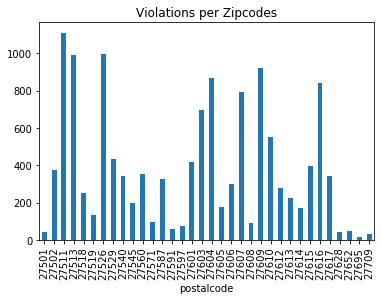

In [227]:
vio_per_zip.plot(kind='bar', title='Violations per Zipcodes')
f1 = plt.gcf()

Here we can see how many violations per postal code there is. We can see that some postal codes exceed 1000 whereas some are below 200. However, to visualize this better we need to inspect the populations per zipcode. <i>* See Ethics & Privacy </i>
<br>
- <b>27501</b> : Population	17,571 ;  Population Density    287 	people per sq mi
- <b>27502</b> : Population	30,831 ;  Population Density	1,088	people per sq mi
- <b>27511</b> : Population	32,029 ;  Population Density    2,733	people per sq mi
- <b>27513</b> : Population	40,755 ;  Population Density	2,578	people per sq mi
- <b>27518</b> : Population	19,630 ;  Population Density	2,040	people per sq mi

*Info from https://www.unitedstateszipcodes.org/
<br>

Looking at the first 5 zipcodes, we can see that the 27501 zipcode has a lower population and population desnity, thus it has a small amount of violations. The 27502 and 27511 zipcodes have similar populations, however the population density of 27511 is more than twice as high as 27502.

We see the 27511 and 27513 zipcodes are similar in population density, however the 27513 zipcode has a higher total population. Despite this, the 27511 zipcode has more total violations than the 27513 zipcode.
<br>

#### Now we will see how many points each health inspector gives.

In [298]:
points = df_violations.groupby('inspectedby')['pointvalue'].sum()
points.sort_values(ascending=False)
df_points = points.to_frame()

In [299]:
df_inspect_range = inspect_range.to_frame()

In [300]:
df = df_inspect_range.join(df_points)

In [301]:
#this is a dataframe of the number of points given by each Inspector, taking the number of visits
#into account as well
df = df.reset_index()
df.columns = ['inspector', '# of visits', '# points given']

In [302]:
df

,inspector,# of visits,# points given
0,Lucy Schrum,15213,4857
1,Andrea Anover,9550,4535
2,Christopher Walker,6096,2948
3,Jennifer Edwards,5834,3366
4,Karla Crowder,5170,3231
5,James Smith,4518,1851
6,Caroline Suggs,4494,1833
7,Angela Myers,4490,2802
8,Naterra McQueen,4120,2704
9,Melissa Harrison,3321,1376


In [305]:
df_noprop = df

In [306]:
df['proportion'] = df['# points given']/df['# of visits']

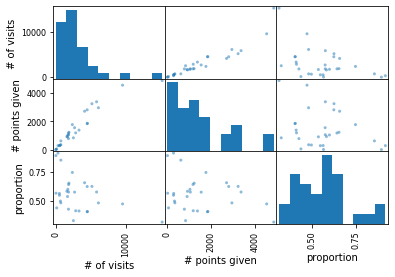

In [307]:
fig = pd.plotting.scatter_matrix(df)

Looking at the scatter matrix, it seems like there is a positive linear trend between the number of visits and the number of points issued. However, we'll use a different type of graph to visualize this more.

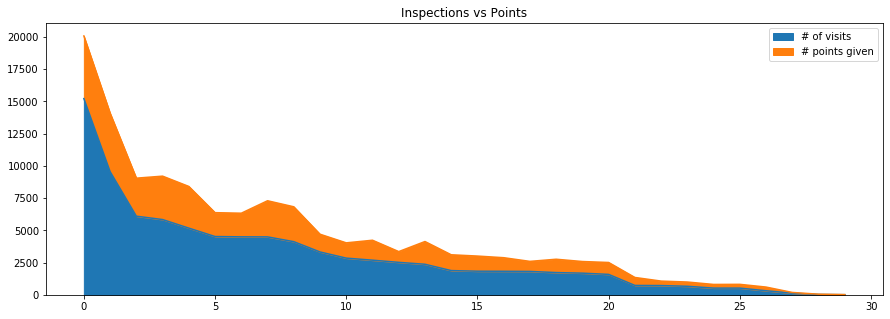

In [304]:
df_noprop.plot(kind='area', title='Inspections vs Points', figsize = (15,5))
f2 = plt.gcf()

We can see that number of points given has a rougher trend than the number of visits, there are more spikes in the number of points data.

In [370]:
df.sort_values(['proportion'], ascending=False)

,inspector,# of visits,# points given,proportion
26,Ginger Johnson,314,286,0.910828
29,Frances Breedlove,9,8,0.888889
21,Jason Dunn,727,618,0.850069
13,Dimitri Parker,2368,1763,0.744510
8,Naterra McQueen,4120,2704,0.656311
14,Daryl Beasley,1878,1226,0.652822
15,Chris Askew,1830,1174,0.641530
4,Karla Crowder,5170,3231,0.624952
7,Angela Myers,4490,2802,0.624053
18,Thomas Jumalon,1724,1034,0.599768


We can sort this dataset by the proportion of points given to the number of visits by each inspector. 

- range of this dataset is 0.319266 to 0.910828

The disparity between these two numbers is too great. There is about a 60% range. For example- out of the 2516 establishments that Tim Bass visited, they issued 834 points (which is 33%); out of the 2368 establishments that Dimitri Parker visited, they issued 1763 points (which is 74%).


# Ethics & Privacy

The name of the establishments have been removed from the dataset, allowing the establishments only to be identified using their HSISIDs. Ideally, the names of the inspectors would be removed due to privacy, however due to the nature of the research question I have decided to keep this in so we can compare data across inspectors specfically. 

All the data used has been obtained through Github/Cogs108. * Previously, I had wanted to obtain data that would give me the population and population density per postal code for my analysis, however the data I was able to obtain did not include the same postal codes. Therefore, I had to scrap that dataset from my analysis. Because I was not able to find a free csv resource for the population per postal code, I individually gathered data for the postal codes I discussed.

Additionally, there may be a privacy concern if restaurant owners are unwilling to share more information than necessary about their establishment. I am unsure if the restaurants in the dataset have consented to sharing their violation history. Although it would be ideal to obtain data from a large variety of restaurants, a way to handle this would be to exclude these restaurants from the data however include the reason why the restaurant was not included.

From the data, there is a large difference between the number of points given and the number of visits by each inspector. For the postalcodes, specifically the 27511 and 27513 postalcodes, there is a similarity between the population densities, however the 27511 zipcode had more violations than the 27513 zipcode. With that being said, this issue could lie within the way each inspector conducts their inspection. Since there is no standardization of health code practices, a solution would be to implement some sort of standardization. By doing this, inspectors are expected to conduct their inspection to the same code.

# Conclusion & Discussion

I narrowed the data to only include data from estalbishments that are classified as "Restaurants" and data from 2015 only. Also, I was able to find the number of vioations per HSISID and the number of points issued by each inspector. I was only interested in the "Out of Compliance" instances of the violations dataset, so I removed data that was considered "In Compliance" or "Not Observed". 

After going through the data, the results showed that the proportion of number of points given by a health inspector and how many visits the health inspector has done has a range of ~ 0.6 or 60%. This is more than 50%. The results also showed that there is a difference amongst zipcodes and the number of violations each zipcode has. This can partly be explained by population per zipcode or the population density of the zipcode. 

The large difference in the proportions for each health inspector could be explained by the region in which the health inspector is assigned. However, from my prior research, I have learned that there is no standardization of health code practices and instead there is only a reccomended guideline for health practices provided by the FDA. By creating an official standardized baseline for health inspection practices, not only would it be easier for establishments to stay within compliance, it would ensure that all health inspectors are using the same expectations during inspections. This will help business owners stay in business and ultimately protect the public from unsafe food practices.

Unfortunately, I was unable to find an accurate (and free) .csv file for population per zipcode for 2015. The data that I did find did not include the zipcodes for the data in question, therefore I had to disregard this aspect of my project. Another limitation I encountered was my lack of familiarity with the coding languages; although I had a good basis from what I learned in class, I found that I was not capable of doing everything that I envisioned in a short amount of time. 